# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# from src.call import call_on_students

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

In [ ]:
# call_on_students(1)

#### Answer: 

- reduces dimensionality while accounting for variance of the original data

- linear algebra and eigenvectors to identitify principal components


### 2: What are some reasons to use PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- many features, large datasets
- can address multicollinearity
- improve speed of model processing
- allows you to visualize when reduced to 2 or 3 components


### 3: Why is scaling important for PCA?

In [ ]:
# call_on_students(1)

#### Answer: 

- use of linear algebra requires data to have linear relationships to one another
- PCA has a hard time understanding variance when all the original columns are on different scales


### 4: How can one determine how many principle components to use in a model?

In [ ]:
# call_on_students(1)

#### Answer: 

- visualization: 2-3 components
- explained variance: consider looking at explained variance, consider stopping after getting seriously diminished returns
- explained variance, usually want n_components to be .8 or more


## PCA in Code

### Set Up

In [2]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- scale, check for nulls (impute)


In [ ]:
# call_on_students(1)

In [3]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()

In [5]:
X_scaled = scaler.fit_transform(X)

In [9]:
X.isna().sum().sum()

0

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [ ]:
# call_on_students(1)

In [10]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA

In [15]:
pca = PCA()
pca = PCA(n_components=.8)

pca.fit(X_scaled)

PCA(n_components=0.8)

### 7: How Much Variance is Explained by the First 2 Components?

In [16]:
# call_on_students(1)

In [17]:
# Code here to answer the question
pca.explained_variance_ratio_[:2].sum()

0.6324320765155939

#### Answer:

- 13%


Also to note:
PCA is a preprocessing tool. Would only need to fit if transforming the data before modeling

# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [ ]:
# call_on_students(1)

#### Answer:

- centroids are picked randomly and 

- After each iteration of clustering, the mean of all datapoints in the cluster is recalculated 



**Their Answer**

-  You set the number of cluster centers (K) - algorithm randomly starts with that number of cluster centers (in random spots!)
-  The algorithm calculates the distance between the centers and each observation and assigns the observation to the closest cluster center to create the first iteration of clusters
-  The algorithm then takes all the observations assigned to each cluster, and moves that cluster center to be at the exact actual center (mean) of the newly created cluster
-  Repeat! Until the cluster centers stop moving (or tolerance is met - some parameters in the implementation)



### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# call_on_students(1)

#### Answer:

- want to decrease inertia!


- Error metric
- inertia measures the distance between each point and its center - the idea is that better clusters are more tightly concentrated
- KMeans tries to minimize, 


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [ ]:
# call_on_students(1)

#### Answer:

- Silhouette score- want to increase
- difference between silhouette score and inertia:tries to maximize similarity within groups and maximize distances between clusters, while inertia just looks within each cluster


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [18]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- scale, check for nulls?


In [ ]:
# call_on_students(1)

In [19]:
# Code to preprocess the data
# Name the processed data X_processed
k_scaler = StandardScaler()

X_processed = k_scaler.fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [ ]:
# call_on_students(1)

In [22]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

In [23]:
# Fit the object
cluster = AgglomerativeClustering(2).fit(X_processed)

In [27]:
# Calculate a silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X_processed, cluster.labels_)

0.5770346019475989

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [ ]:
# call_on_students(1)

In [32]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Fit the new clustering model
    new_cluster = AgglomerativeClustering(n).fit(data)
    
    # Print the silhouette score
    print(f"silhouette score ({n} clusters): {silhouette_score(data, new_cluster.labels_)}")
    # Return the labels attribute from the fit clustering model
    return new_cluster.labels_
    
    

In [33]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

silhouette score (2 clusters): 0.5770346019475989
silhouette score (3 clusters): 0.446689041028591
silhouette score (4 clusters): 0.4006363159855973
silhouette score (5 clusters): 0.33058726295230545
silhouette score (6 clusters): 0.3148548010051283
silhouette score (7 clusters): 0.316969830299128
silhouette score (8 clusters): 0.310946529007258


# 3) Time Series

In [66]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- set the date as datetime
- set the new date time as the index


In [67]:
# call_on_students(1)

In [68]:
# do it in one line
# ap = ap.drop('Month', axis=1).set_index(pd.to_datetime(ap['Month']))

In [69]:
# Code here 
ap['Month'] = pd.to_datetime(ap['Month'])

In [70]:
ap.set_index('Month', inplace=True)

In [71]:
ap

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### 15: Explore Patterns in the Data

In [72]:
# call_on_students(1)

First: what kinds of patterns can one find in time series data?

- seasonality
- cyclical
- linear (upward/downward mean)
- trends in variance (increasing or decreasing)


Second, plot this time series data. What kinds of patterns do you see in this dataset?

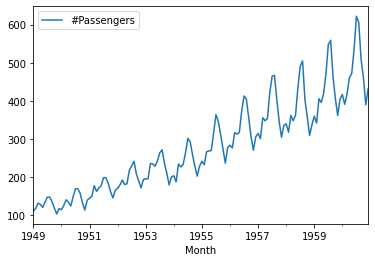

In [74]:
# Code to plot the time series
ap.plot();

### 16: Explore the Moving Average

What window would make sense to use for this data?

- window = 12 since its seasonal (yearly)


In [ ]:
# call_on_students(1)

In [75]:
# Code to create the moving average
sma = ap.rolling(window=12).mean()

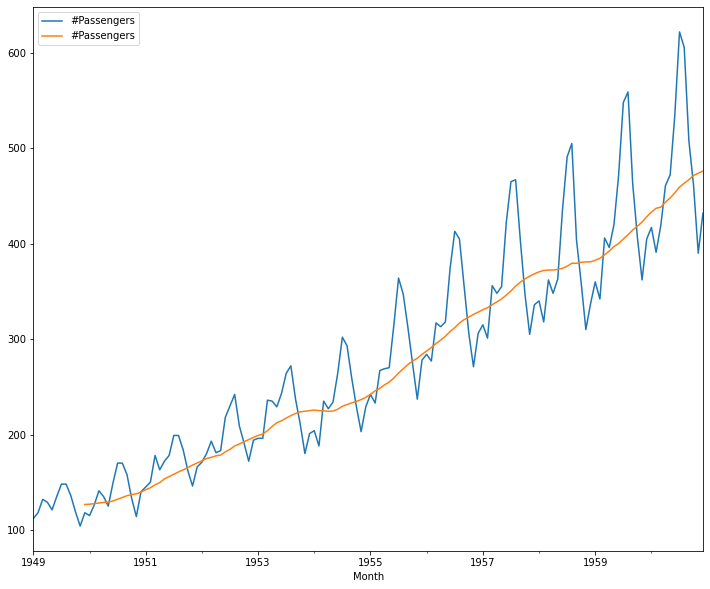

In [87]:
# Add to the moving average to the above plot
fig, ax = plt. subplots(figsize=(12, 10))
ap.plot(ax=ax);
sma.plot(ax=ax);

### 17: Explore Stationarity


In [ ]:
# call_on_students(1)

Why do we try to make our data stationary?

- get rid of the noise
- model performs better on stationary data because it helps the model focus on the part that actually needs predicting


What can we do to make our data stationary?

- differencing
- subtracting moving average
- transformations (log or linear)


### 18: Check Stationarity

In [ ]:
# call_on_students(1)

In [93]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ap)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

(0.8153688792060348, 0.9918802434376408, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)
Results of Dickey-Fuller test: 

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [90]:
# Code here to check if the data is stationary
def stationarity_check(ts=None):
    ''' input a time series dataframe and see if its stationary.'''
    
    roll_mean = ts.rolling(window=8, center=False).mean()
    roll_std = ts.rolling(window=8, center=False).std()
    
    dftest = adfuller(ts)

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    
    results_df = {'stationary at 1%?': dfoutput[4]>dfoutput[0],
                  'stationary at 5%?': dfoutput[5]>dfoutput[0],
                  'stationary at 10%?': dfoutput[6]>dfoutput[0]}

    dfoutput = dfoutput.astype('object')
    dfoutput = pd.concat([dfoutput, pd.Series(results_df).astype('bool')])

    
    fig, ax = plt.subplots(figsize=(12,10))
    ts.plot(ax=ax)
    roll_mean.plot(ax=ax)
    roll_std.plot(ax=ax)
    ax.legend(['# Passengers', 'SMA', 'STD'])    
   

    return print(f'Results of Dickey-Fuller test: \n{dfoutput}')

Results of Dickey-Fuller test: 
Test Statistic                 0.815369
p-value                         0.99188
#Lags Used                           13
Number of Observations Used         130
Critical Value (1%)            -3.48168
Critical Value (5%)            -2.88404
Critical Value (10%)           -2.57877
stationary at 1%?                 False
stationary at 5%?                 False
stationary at 10%?                False
dtype: object


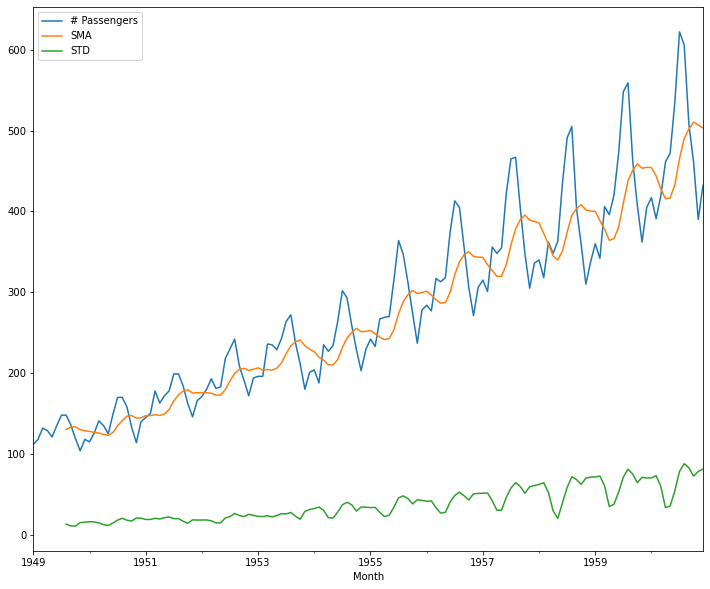

In [91]:
stationarity_check(ap)

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [ ]:
# call_on_students(1)

In [94]:
# Code here to try to make the data stationary
data_diff = ap.diff(periods=12)

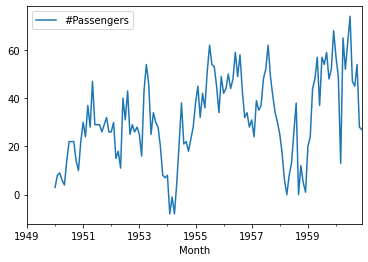

In [95]:
data_diff.plot();

Results of Dickey-Fuller test: 
Test Statistic                  -3.38302
p-value                        0.0115515
#Lags Used                             1
Number of Observations Used          130
Critical Value (1%)             -3.48168
Critical Value (5%)             -2.88404
Critical Value (10%)            -2.57877
stationary at 1%?                  False
stationary at 5%?                   True
stationary at 10%?                  True
dtype: object


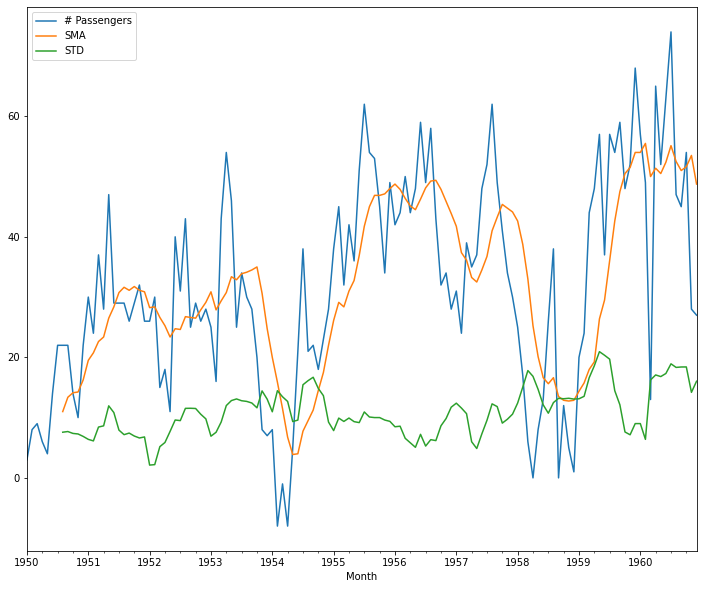

In [97]:
# Code here to check if the data is stationary
data_diff= data_diff.dropna()
stationarity_check(data_diff)

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [ ]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [ ]:
# call_on_students(1)

#### Answer:

1. lowercase/remove punctuation
2. Tokenize
3. remove stopwords
4. lem vs stem

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- Columns headings:filtered tokens in the corpus
- rows (the index): documents that are being vectorized
- actual data is tf-idf or counts


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- (Term Frequency-Inverse Document Frequency)

- checks how frequent a word appears in a particular document
- checks how rare the word is across documents


## NLP in Code

### Set Up

In [98]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [99]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\r\n...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [ ]:
# call_on_students(1)

In [100]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(policies['policy'], policies['candidate'])

In [101]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [102]:
# Instantiate it
vectorizer = CountVectorizer()

In [103]:
# Fit it
vectorizer.fit(X_train)

CountVectorizer()

### 24: Vectorize Your Text, Then Model

In [ ]:
# call_on_students(1)

In [104]:
# Code here to transform train and test sets with the vectorizer
train_transform = vectorizer.transform(X_train)
test_transform = vectorizer.transform(X_test)

In [106]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
rf = RandomForestClassifier(random_state=42).fit(train_transform, y_train)

In [107]:
# Code here to evaluate your model on the test set
rf.score(test_transform, y_test)

0.8125